In [2]:
# import numpy library as np
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
import codecs
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tqdm import tqdm

import re # for string matching
from bs4 import BeautifulSoup  # for handling html data
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline
pd.set_option('display.max_colwidth', 200)


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


import keras
#below libs for using functional API of Keras
from keras import Input, Model
from keras.layers import InputLayer, Dense, concatenate, Flatten

#CNN
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D,concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import os, unicodecsv as csv
import pandas as pd
import os
import shutil
import glob
#Pip install imutils
from imutils import paths

Using TensorFlow backend.


# Image Processing Part with CNN

In [3]:
#training set creation
train_data_file=pd.read_csv('task_humanitarian_text_img_agreed_lab_train.tsv',sep='\t', header=0, usecols=lambda x:x.lower() in ['image','label_image'])

In [4]:
train_data_file.head()

,image,label_image
0,data_image/california_wildfires/10_10_2017/917793137925459968_0.jpg,infrastructure_and_utility_damage
1,data_image/california_wildfires/10_10_2017/917793137925459968_1.jpg,infrastructure_and_utility_damage
2,data_image/california_wildfires/10_10_2017/917793137925459968_2.jpg,infrastructure_and_utility_damage
3,data_image/california_wildfires/10_10_2017/917815040962695168_2.jpg,infrastructure_and_utility_damage
4,data_image/california_wildfires/10_10_2017/917828283047260161_0.jpg,other_relevant_information


In [8]:
import cv2

#train_image_file_path="image_train_allclass"

img_train_data=[]
img_train_labels=[]

for img_name in train_data_file.image:
   
    image=cv2.imread('./' + img_name)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    img_train_data.append(image)
    
img_train_data=np.array(img_train_data) / 255.0


In [9]:
# shape of the images
img_train_data.shape

(6126, 224, 224, 3)

In [10]:
# storing the target variable in separate variable
y_train = train_data_file.label_image.values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_en = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
y_train_cat = to_categorical(y_train_en)

img_train_labels=np.array(y_train_cat)

In [11]:
img_train_labels.shape

(6126, 5)

In [12]:
#training set creation
validation_data_file=pd.read_csv('task_humanitarian_text_img_agreed_lab_dev.tsv',sep='\t', header=0, usecols=lambda x:x.lower() in ['image','label_image'])

In [13]:
validation_data_file.head()

,image,label_image
0,data_image/california_wildfires/17_10_2017/920329866901381123_0.jpg,not_humanitarian
1,data_image/hurricane_irma/18_9_2017/909744783115120640_0.jpg,other_relevant_information
2,data_image/hurricane_irma/18_9_2017/909925247331241984_0.jpg,not_humanitarian
3,data_image/hurricane_irma/18_9_2017/909819142970241024_0.jpg,not_humanitarian
4,data_image/hurricane_maria/20_9_2017/910526223918309376_0.jpg,other_relevant_information


In [10]:
validation_image_file_path="image_valid_allclass"

img_valid_data=[]
img_valid_labels=[]

for img_name in validation_data_file.image_id:
   
    image=cv2.imread('./' + img_name)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    img_valid_data.append(image)
    
img_valid_data=np.array(img_valid_data) / 255.0

In [11]:
# storing the target variable in separate variable
y_valid = validation_data_file.label_image.values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_valid)
y_valid_en = encoder.transform(y_valid)

# convert integers to dummy variables (i.e. one hot encoded)
y_valid_cat = to_categorical(y_valid_en)

img_valid_labels=np.array(y_valid_cat)

In [12]:
# shape of the images
print("img_valid_data: ",img_valid_data.shape)
print("img_valid_labels: ", img_valid_labels.shape)

img_valid_data:  (998, 224, 224, 3)
img_valid_labels:  (998, 5)


In [13]:
# create random number generator
seed = 42

In [14]:
#test set creation

test_data_file=pd.read_csv('task_humanitarian_text_img_agreed_lab_test.tsv',sep='\t', header=0, usecols=lambda x:x.lower() in ['image','label_image'])

In [15]:
test_data_file.head()

,image,label_image
0,data_image/hurricane_harvey/8_9_2017/905952332923338752_0.jpg,rescue_volunteering_or_donation_effort
1,data_image/mexico_earthquake/24_9_2017/912022130396672000_0.jpg,not_humanitarian
2,data_image/hurricane_maria/7_11_2017/927758858776465408_0.jpg,infrastructure_and_utility_damage
3,data_image/hurricane_harvey/12_9_2017/907654309587779584_0.jpg,other_relevant_information
4,data_image/hurricane_maria/29_9_2017/913745586104528898_0.jpg,not_humanitarian


In [36]:

img_test_data=[]
img_test_labels=[]

for img_name in test_data_file.image_id:
   
    image=cv2.imread('./' + img_name)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    img_test_data.append(image)
    
img_test_data=np.array(img_test_data) / 255.0

In [93]:
# storing the target variable in separate variable
y_test = test_data_file.label_image.values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
y_test_en = encoder.transform(y_test)

# convert integers to dummy variables (i.e. one hot encoded)
y_test_cat = to_categorical(y_test_en)

img_test_labels=np.array(y_test_cat)

In [94]:
# shape of the images
print("img_test_data: ",img_test_data.shape)
print("img_test_labels: ", img_test_labels.shape)

img_test_data:  (955, 224, 224, 3)
img_test_labels:  (955, 5)


In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

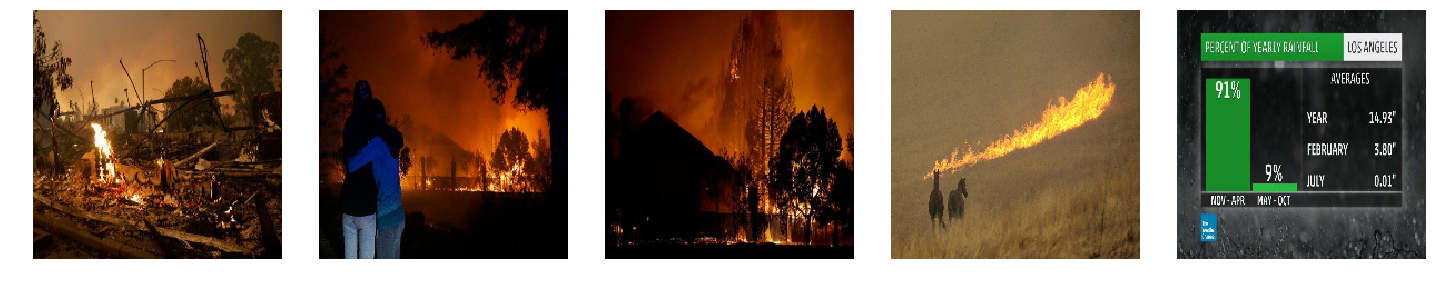

In [15]:
plotImages(img_train_data[:5])

In [16]:
#CNN model till dense layer

img_width=224 
img_height=224

image_input = tf.keras.Input(shape=(img_height, img_width, 3))
# Note the input shape is the desired size of the image e.g 300x300 with 3 bytes color

# This is the first convolution
conv1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', strides=(1, 1), padding='valid')(image_input)
pool1=tf.keras.layers.MaxPooling2D((2, 2),padding='valid')(conv1)

 # The second convolution
conv2= tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool1)
pool2=tf.keras.layers.MaxPooling2D((2,2),padding='valid')(conv2)

# The third convolution
conv3=tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool2)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv3)
    # The fourth convolution
conv4=tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool3)
pool4= tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv4)
    # The fifth convolution
conv5= tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool4)
pool5=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv4)
    # Flatten the results to feed into a DNN
flatten=tf.keras.layers.Flatten()(pool5)
    # 512 neuron hidden layer
img_dense1 =tf.keras.layers.Dense(512, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(l = 0.001))(flatten)
bn1=tf.keras.layers.BatchNormalization()(img_dense1)
drop1=tf.keras.layers.Dropout(rate=0.5)(bn1)

img_dense2= tf.keras.layers.Dense(256, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(l = 0.001))(drop1)
bn2=tf.keras.layers.BatchNormalization()(img_dense2)
drop2=tf.keras.layers.Dropout(rate=0.5)(bn2)

#final layer
image_out=tf.keras.layers.Dense(5, activation='softmax')(drop2)

#model defination
model = tf.keras.Model(inputs=image_input, outputs=image_out)


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0     

In [18]:
#define optimizer and loss
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
# checkpoint to save best model during training
#mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

mc=tf.keras.callbacks.ModelCheckpoint("weights.CrisisMMD.CNN.best.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# EarlyStopping with patience - means training will be stopped if val loss is not reduced for 5 continous epochs
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

In [21]:
#train the model 
history=model.fit(img_train_data, img_train_labels, batch_size=32, epochs=20, verbose=1, validation_data=(img_valid_data, img_valid_labels), callbacks=[mc])

Train on 6126 samples, validate on 998 samples
Epoch 1/20
6112/6126 [============================>.] - ETA: 0s - loss: 1.7964 - accuracy: 0.3758
Epoch 00001: val_loss improved from inf to 2.27117, saving model to weights.CrisisMMD.CNN.best.hdf5
6126/6126 [==============================] - 332s 54ms/sample - loss: 1.7945 - accuracy: 0.3764 - val_loss: 2.2712 - val_accuracy: 0.5020
Epoch 2/20
6112/6126 [============================>.] - ETA: 0s - loss: 1.3523 - accuracy: 0.4895
Epoch 00002: val_loss did not improve from 2.27117
6126/6126 [==============================] - 351s 57ms/sample - loss: 1.3522 - accuracy: 0.4896 - val_loss: 2.2743 - val_accuracy: 0.3226
Epoch 3/20
6112/6126 [============================>.] - ETA: 0s - loss: 1.1931 - accuracy: 0.5224
Epoch 00003: val_loss did not improve from 2.27117
6126/6126 [==============================] - 320s 52ms/sample - loss: 1.1931 - accuracy: 0.5225 - val_loss: 2.5226 - val_accuracy: 0.2435
Epoch 4/20
1152/6126 [====>................

KeyboardInterrupt: 

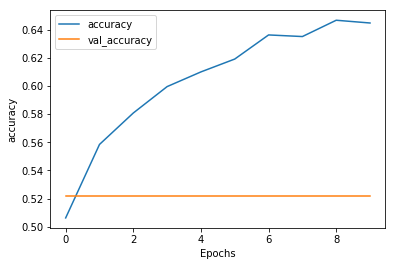

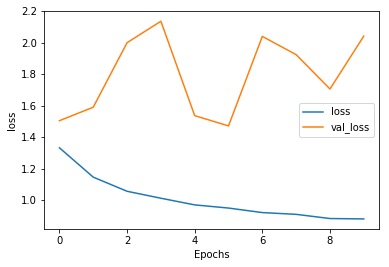

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Evaluating Model Performance

In [ ]:
# accuracy on training set
score = model.evaluate(X_train_data_seq, Y_train_labels, verbose=0)
print('train loss:', score[0])
print('train accuracy:', score[1])

In [ ]:
# accuracy on validation set

score = model.evaluate(X_valid_data_seq, Y_valid_labels, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

In [ ]:
# accuracy on validation set

score = model.evaluate(X_test_data_seq, Y_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [22]:
# load weights into new model
model.load_weights("weights.CrisisMMD.CNN.best.hdf5")

#predict probabilities
#pred_prob = model.predict(img_valid_data)

NameError: name 'X_test_data_seq' is not defined

In [ ]:
import numpy as np
from keras.preprocessing import image

#uploaded = files.upload()

#for fn in uploaded.keys():
 
  # predicting images
#path = '/image_test/affected_individuals'
img = image.load_img('904568770982764545_0.jpg',target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

 # images = np.vstack([x])
classes = model.predict(x, batch_size=10)
print(classes[0])
   # if classes[0]>0.5:
        #print(" is a human")
   # else:
        #print(" is a horse")